### Importing Libraries for data preprocessing and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
#import gc
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pylab as py 
import statsmodels.api as sm
from scipy import stats

### Reading CRESCI dataset

In [2]:
df=pd.read_csv("/home/lenovo/Downloads/finaldata.csv")

In [3]:
# checking the first few rows of the dataset to see what we're dealing with
df.head()

Unnamed: 0        id           name      screen_name  statuses_count  \
0           0   7248952   Bhuvan Chand      tarunkjuyal            1259   
1           1   7732472  Daniel Wagner     DanielWagner             770   
2           2   9524952    Andrew Lock       Andrewlock            1100   
3           3  10788822   Tim Thompson  yourinsaneworld            6497   
4           4  14596967        fxgenie          fxgenie            3203   

   followers_count  friends_count  favourites_count  listed_count  \
0              837           1978              3200             9   
1             3274           3595                 8            22   
2            38849          34504                41          1014   
3             5902           5496                 0            82   
4             2570           2638                 0             5   

                                     url  ...  \
0                 http://lifeofearth.org  ...   
1  http://www.yourinternetbuddies.com/go  ...   
2          http://www.helpmybusiness.com  ...   
3       http://investing-information.com  ...   
4              http://www.4xgenie.com/wp  ...   

                                         description contributors_enabled  \
0                                     Love Your Life                  NaN   
1  I am an internet marketing coach and mentor wh...                  NaN   
2  Marketing Geek & Presenter of 'Help! My Busine...                  NaN   
3  I am a member of a network of stock investing ...                  NaN   
4                                       forex trader                  NaN   

  following      created_at            timestamp           crawled_at  \
0       NaN  1183552203000L  2007-07-04 14:30:03  2010-11-07 11:10:52   
1       NaN  1185440851000L  2007-07-26 11:07:31  2010-11-07 11:10:52   
2       NaN  1192725360000L  2007-10-18 18:36:00  2010-11-07 11:10:52   
3       NaN  1196614406000L  2007-12-02 17:53:26  2010-11-07 11:10:52   
4       NaN  1209536534000L  2008-04-30 08:22:14  2010-11-07 11:10:52   

               updated      Category  random testset  
0  2016-03-14 17:05:53  traditional1      79    Test  
1  2016-03-14 17:05:54  traditional1       4   Train  
2  2016-03-14 17:05:54  traditional1      72    Test  
3  2016-03-14 17:05:54  traditional1      83    Test  
4  2016-03-14 17:05:54  traditional1      30   Train  

[5 rows x 44 columns]

In [4]:
#dropping column Unnamed: 0
df = df.drop("Unnamed: 0", axis = 1)

#setting user.id as index of the dataframe 
#df = df.set_index('id')

In [9]:
df = df.drop('testset', axis = 1)

In [5]:
# inspecting the data
df.shape

(11017, 43)

In [6]:
#getting details about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [10]:
df.head()

id           name      screen_name  statuses_count  followers_count  \
0   7248952   Bhuvan Chand      tarunkjuyal            1259              837   
1   7732472  Daniel Wagner     DanielWagner             770             3274   
2   9524952    Andrew Lock       Andrewlock            1100            38849   
3  10788822   Tim Thompson  yourinsaneworld            6497             5902   
4  14596967        fxgenie          fxgenie            3203             2570   

   friends_count  favourites_count  listed_count  \
0           1978              3200             9   
1           3595                 8            22   
2          34504                41          1014   
3           5496                 0            82   
4           2638                 0             5   

                                     url lang  ... notifications  \
0                 http://lifeofearth.org  NaN  ...           NaN   
1  http://www.yourinternetbuddies.com/go  NaN  ...           NaN   
2          http://www.helpmybusiness.com  NaN  ...           NaN   
3       http://investing-information.com  NaN  ...           NaN   
4              http://www.4xgenie.com/wp  NaN  ...           NaN   

                                         description  contributors_enabled  \
0                                     Love Your Life                   NaN   
1  I am an internet marketing coach and mentor wh...                   NaN   
2  Marketing Geek & Presenter of 'Help! My Busine...                   NaN   
3  I am a member of a network of stock investing ...                   NaN   
4                                       forex trader                   NaN   

   following      created_at            timestamp           crawled_at  \
0        NaN  1183552203000L  2007-07-04 14:30:03  2010-11-07 11:10:52   
1        NaN  1185440851000L  2007-07-26 11:07:31  2010-11-07 11:10:52   
2        NaN  1192725360000L  2007-10-18 18:36:00  2010-11-07 11:10:52   
3        NaN  1196614406000L  2007-12-02 17:53:26  2010-11-07 11:10:52   
4        NaN  1209536534000L  2008-04-30 08:22:14  2010-11-07 11:10:52   

               updated      Category random  
0  2016-03-14 17:05:53  traditional1     79  
1  2016-03-14 17:05:54  traditional1      4  
2  2016-03-14 17:05:54  traditional1     72  
3  2016-03-14 17:05:54  traditional1     83  
4  2016-03-14 17:05:54  traditional1     30  

[5 rows x 42 columns]

In [98]:
#dropping variables which primarily do make sense in our analysis, in future we may return to the variables if need be.
#df = df.drop(["location", "utc_offset", "is_translator", "follow_request_sent", "notifications", "description", "contributors_enabled","crawled_at","updated","random","testset"], axis = 1)
#df

id             name      screen_name  statuses_count  \
0         7248952     Bhuvan Chand      tarunkjuyal            1259   
1         7732472    Daniel Wagner     DanielWagner             770   
2         9524952      Andrew Lock       Andrewlock            1100   
3        10788822     Tim Thompson  yourinsaneworld            6497   
4        14596967          fxgenie          fxgenie            3203   
...           ...              ...              ...             ...   
11012   205218909       Alejandro   zombiemaster999             315   
11013  2874966164  Zubair Niazi Ⓜ️   zubairniaziPTI            4099   
11014  2980901837          Zuhazuu         zuhazuu1             199   
11015   121122678          zveljka          zveljka            2609   
11016  2910276853     // karime //      cypherjimin           20997   

       followers_count  friends_count  favourites_count  listed_count  \
0                  837           1978              3200             9   
1                 3274           3595                 8            22   
2                38849          34504                41          1014   
3                 5902           5496                 0            82   
4                 2570           2638                 0             5   
...                ...            ...               ...           ...   
11012               94            597                36             4   
11013             5378           1238               471             6   
11014               18            136                 6             0   
11015               41            263               121             0   
11016              498            109             12105             5   

                                         url lang  ...  \
0                     http://lifeofearth.org  NaN  ...   
1      http://www.yourinternetbuddies.com/go  NaN  ...   
2              http://www.helpmybusiness.com  NaN  ...   
3           http://investing-information.com  NaN  ...   
4                  http://www.4xgenie.com/wp  NaN  ...   
...                                      ...  ...  ...   
11012                                    NaN   es  ...   
11013                 http://t.co/yuROtYHG8K   en  ...   
11014                                    NaN   en  ...   
11015                                    NaN   en  ...   
11016                 http://t.co/bDpPtRkCnH   en  ...   

      profile_sidebar_fill_color  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   
...                          ...   
11012                     EFEFEF   
11013                     000000   
11014                     DDEEF6   
11015                     7AC3EE   
11016                     000000   

                            profile_background_image_url  \
0      http://s.twimg.com/a/1288374569/images/themes/...   
1      http://a3.twimg.com/profile_background_images/...   
2      http://s.twimg.com/a/1288305442/images/themes/...   
3      http://s.twimg.com/a/1288039940/images/themes/...   
4      http://a1.twimg.com/profile_background_images/...   
...                                                  ...   
11012  http://pbs.twimg.com/profile_background_images...   
11013  http://pbs.twimg.com/profile_background_images...   
11014   http://abs.twimg.com/images/themes/theme1/bg.png   
11015  http://pbs.twimg.com/profile_background_images...   
11016   http://abs.twimg.com/images/themes/theme1/bg.png   

       profile_background_color  profile_link_color protected verified  \
0                           NaN                 NaN       NaN      NaN   
1                           NaN                 NaN       NaN      NaN   
2                           NaN                 NaN       NaN      NaN   
3                           NaN                 NaN       NaN      NaN   
4                           NaN                 NaN       NaN   

In [11]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["Category"] == 'genuine', "class"] = "0"
df.loc[df["Category"] != 'genuine', "class"] = "1"
#df = df.drop(["Category"], axis = 1)

#genuine class is denoted by 0 and bot/spam by 1

In [12]:
df['class'].value_counts()

1    7543
0    3474
Name: class, dtype: int64

##### we observe that there are 7543 bot/spam/non-genuine accounts and there is a bias in data towards bots

In [13]:
df.isnull().sum()

id                                        0
name                                      1
screen_name                               0
statuses_count                            0
followers_count                           0
friends_count                             0
favourites_count                          0
listed_count                              0
url                                    7509
lang                                   1000
time_zone                              6002
location                               6109
default_profile                        9540
default_profile_image                 10945
geo_enabled                            7723
profile_image_url                         0
profile_banner_url                     6198
profile_use_background_image           1514
profile_background_image_url_https     1000
profile_text_color                     1000
profile_image_url_https                1000
profile_sidebar_border_color           1000
profile_background_tile         

##### Columns with high null values like verified or following suggests that we should ideally drop these columns

#### putting missing values as 0 in default_profile, protected, default_profile_image and verified columns
#### initial thoughts of putting 0 in place of null value was put on hold
df["default_profile"] = df["default_profile"].fillna(0)
df["protected"] = df["protected"].fillna(0)
df["default_profile_image"] = df["default_profile_image"].fillna(0)
df["verified"] = df["verified"].fillna(0)
df["geo_enabled"] = df["geo_enabled"].fillna(0)
df["profile_background_tile"] = df["profile_background_tile"].fillna(0)
df["profile_use_background_image"] = df["profile_use_background_image"].fillna(0)

### Doing EDA to understand data

In [14]:
df_1_1 = df[['id', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'default_profile', 'default_profile_image', 'protected', 'verified', 'class']]

In [15]:
list = [['default_profile', 'default_profile_image', 'protected', 'verified', 'class']]
for i in list:
    df_1_1[i] = df_1_1[i].astype('category')

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
pd.options.display.float_format = '{:.5f}'.format
df_1_1.describe()


id  statuses_count  followers_count  friends_count  \
count      11017.00000     11017.00000      11017.00000    11017.00000   
mean  1235671181.91831      6581.37388       1126.98212      656.01008   
std   1084879756.90642     19725.68212      30698.01764     3039.02263   
min       678033.00000         0.00000          0.00000        0.00000   
25%    106849778.00000        46.00000          6.00000       40.00000   
50%    633895744.00000        99.00000        131.00000      202.00000   
75%   2360091846.00000      4272.00000        520.00000      542.00000   
max   4331279781.00000    399555.00000    2991573.00000   211890.00000   

       favourites_count  listed_count  
count       11017.00000   11017.00000  
mean         1492.33857      14.55051  
std          6856.57435     304.79843  
min             0.00000       0.00000  
25%             0.00000       0.00000  
50%             0.00000       1.00000  
75%           196.00000       5.00000  
max        313954.00000   24348.00000

<function matplotlib.pyplot.show(close=None, block=None)>

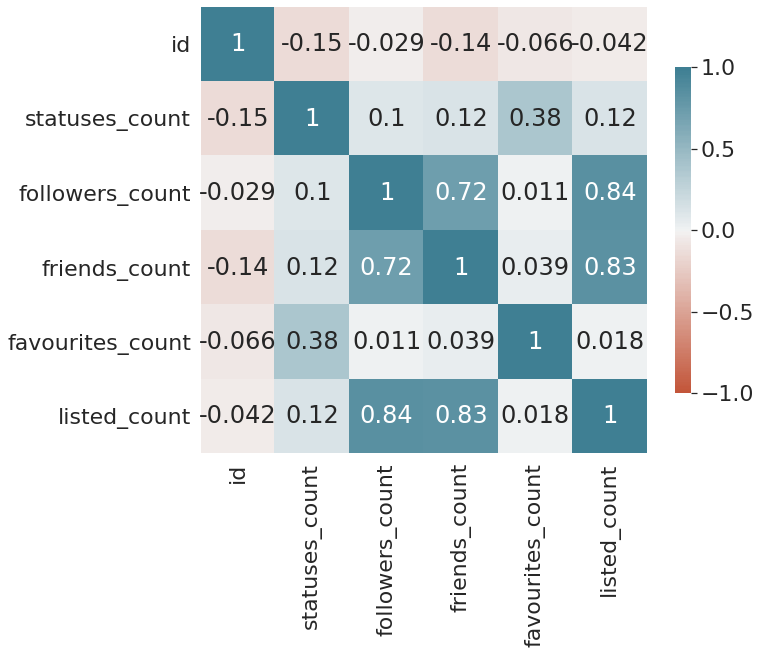

In [17]:
corrMatrix = df_1_1.corr()
sns.set(rc = {'figure.figsize':(10, 10)} )
sns.set(font_scale = 2)
sns.heatmap(corrMatrix, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), square = True, cbar_kws = {'shrink': 0.6}, annot = True)
plt.show

###### Based on the correlation map of different variables, we observe that certain variables have extremly high correlation and that makes the variable unsuitable for logistic regression

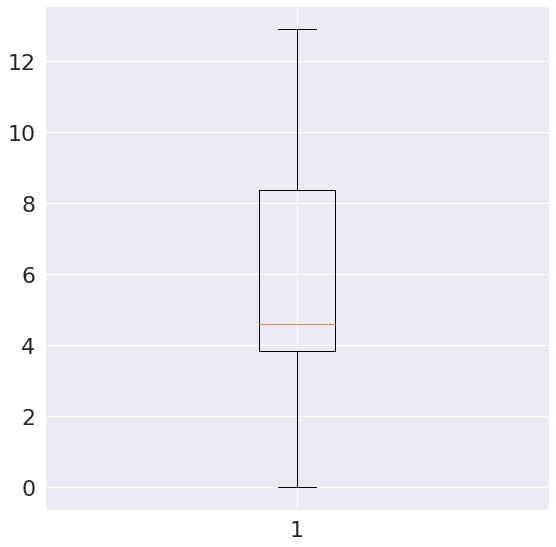

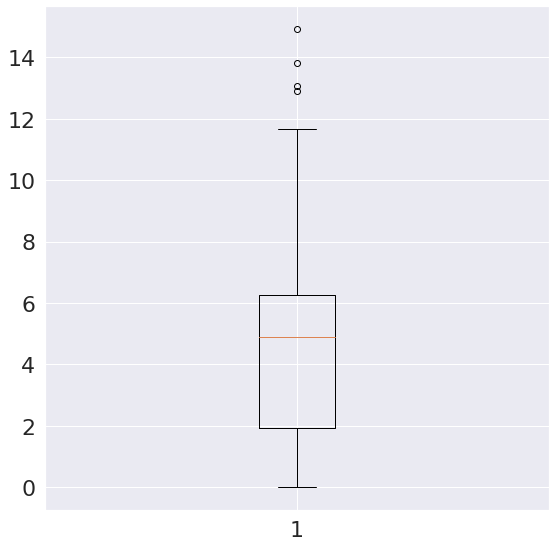

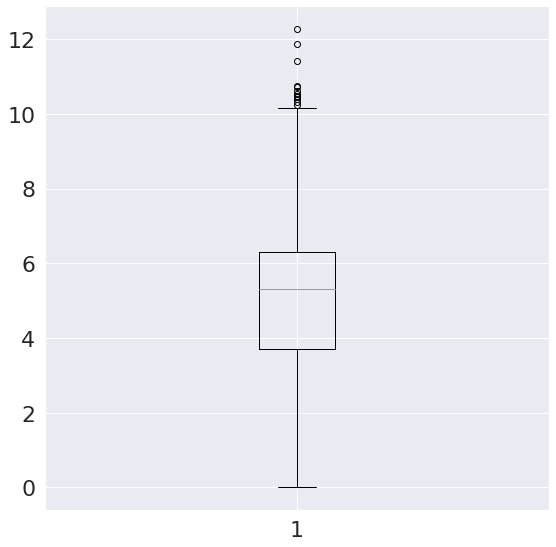

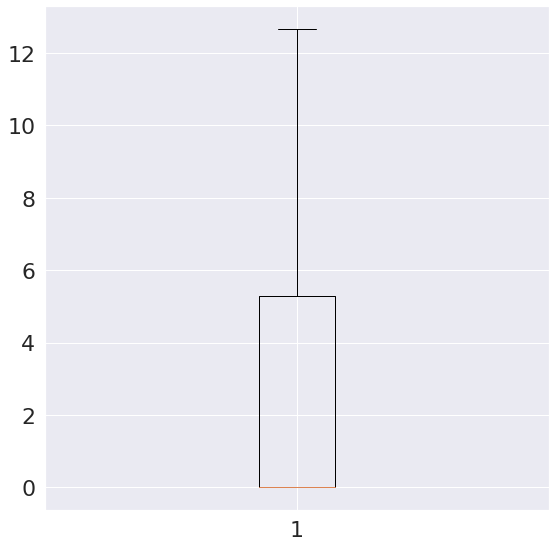

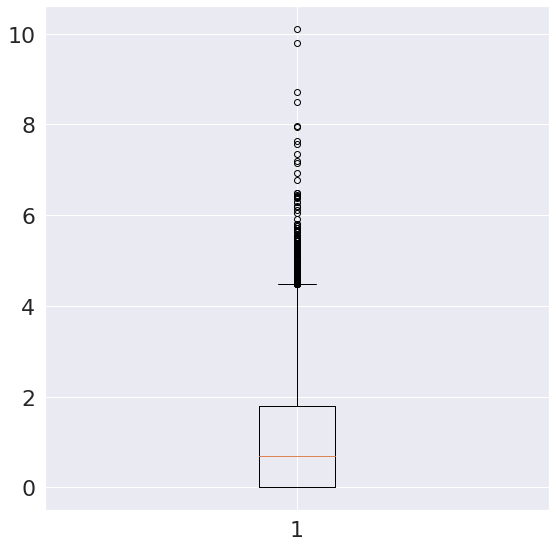

In [18]:
list = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']
for i in list:
    fig = plt.figure(figsize =(7, 7)) 
    # Creating axes instance 
    ax = fig.add_axes([1, 1, 1, 1]) 
    #change of origin by adding 1 to the original data 
    ax.boxplot(np.log(df_1_1[i] + 1 ))

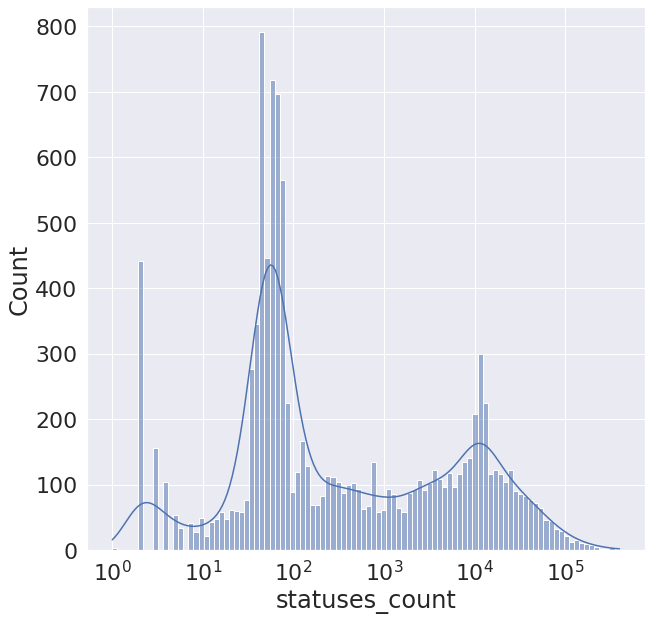

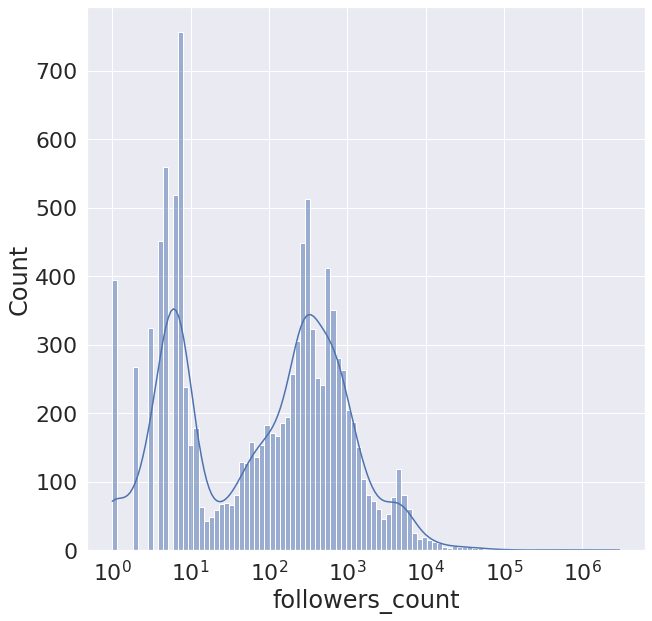

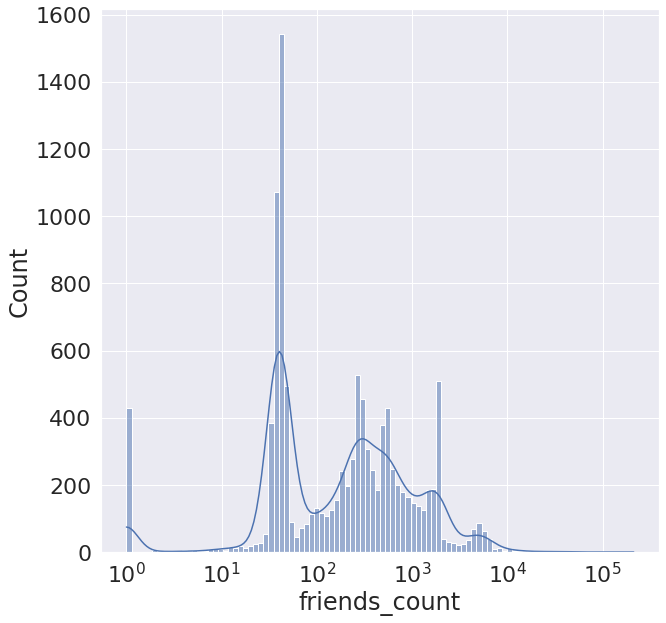

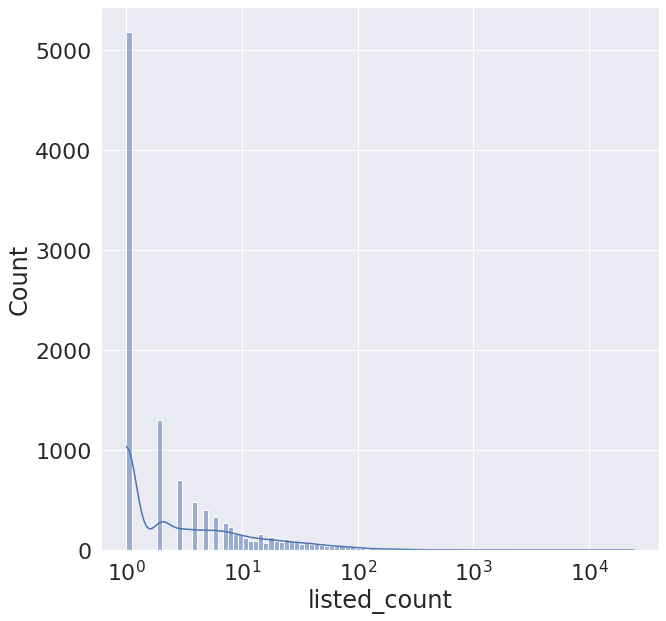

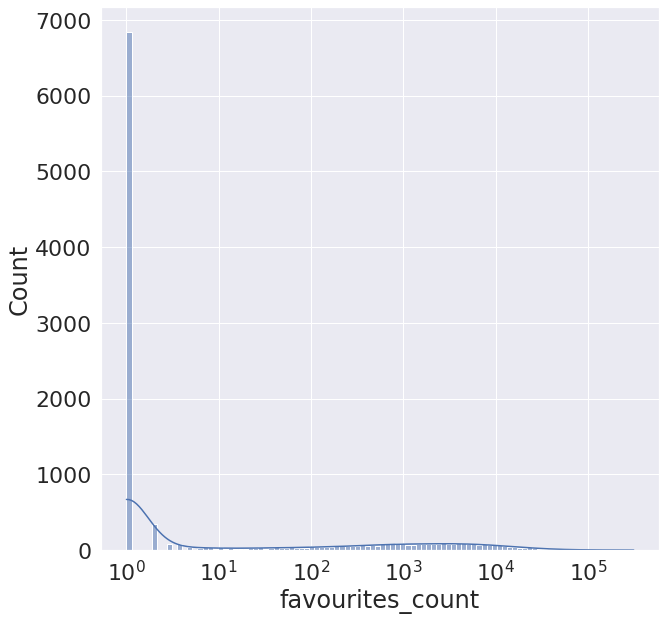

In [19]:
list = {'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count'}
for i in list:
    fig, ax = plt.subplots(1)
    sns.histplot(df_1_1[i]+1, bins = 100, log_scale= True, kde = True)
    #np.log(df[i]+1).plot.hist(bins = 100)

In [20]:
crim_boxcox = stats.boxcox(df['statuses_count']+1)[0]

<AxesSubplot:ylabel='Count'>

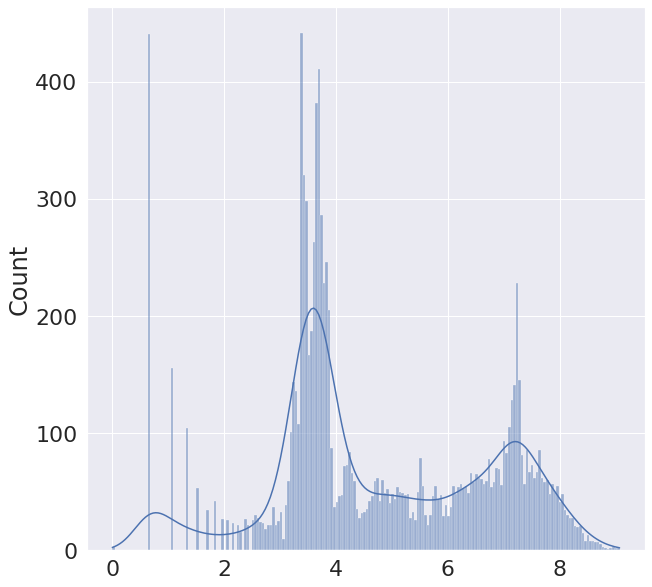

In [21]:
sns.histplot(data = crim_boxcox, bins = 200, kde = True)

In [22]:
pd.crosstab(df_1_1['verified'], df_1_1['protected'])

Empty DataFrame
Columns: []
Index: []

In [143]:
pd.crosstab(df['default_profile'], df['protected'])

protected         True
default_profile       
True             11017

In [144]:
pd.crosstab(df['default_profile'], df['protected'])

protected         True
default_profile       
True             11017

In [145]:
pd.crosstab(df['default_profile'], df['default_profile_image'])

default_profile_image   True
default_profile             
True                   11017

In [146]:
pd.crosstab(df['class'], df['verified'])

verified  True
class         
False     3474
True      7543

In [147]:
pd.crosstab(df['class'], df['protected'], margins = True)

protected   True    All
class                  
False       3474   3474
True        7543   7543
All        11017  11017

In [148]:
pd.crosstab(df['protected'], df['verified'], margins = True)

verified    True    All
protected              
True       11017  11017
All        11017  11017

In [149]:
pd.crosstab(df['verified'], df['class'], margins = True)

class     False  True    All
verified                    
True       3474  7543  11017
All        3474  7543  11017

class                                                     False  True 
verified protected default_profile default_profile_image              
True     True      True            True                    3474   7543

<Figure size 720x720 with 0 Axes>

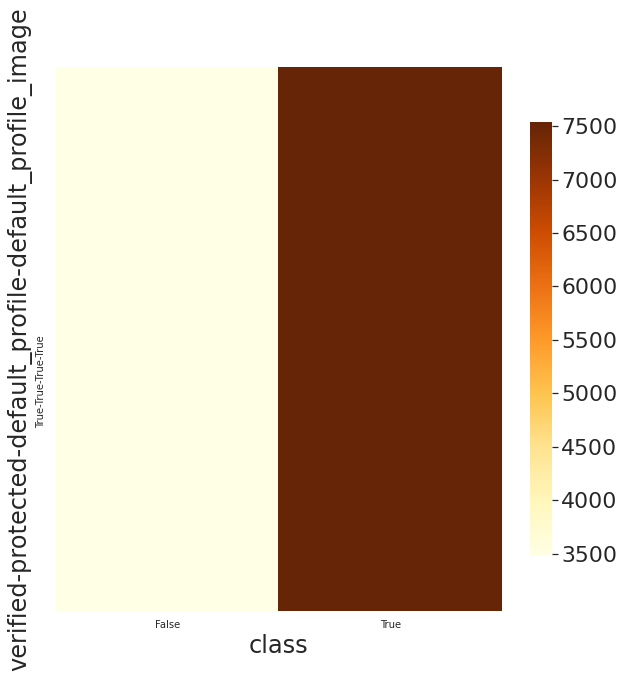

In [150]:
plt.clf()
cross = pd.crosstab(index = [df['verified'], df['protected'], df['default_profile'], df['default_profile_image']], columns = df['class'])
plt.subplots(figsize=(10,10))
plt.tick_params(labelsize = 10)
sns.heatmap(cross, cmap = 'YlOrBr', cbar_kws = {'shrink': 0.8})
cross

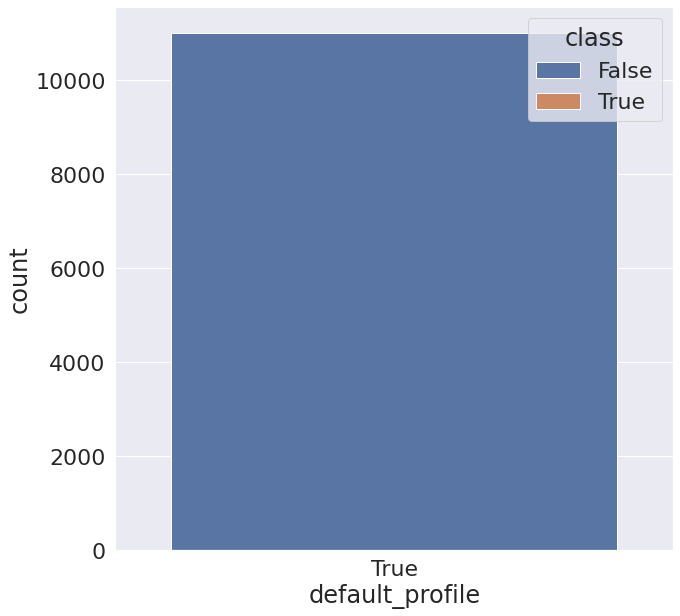

In [151]:
df_bar = df[['verified', 'protected', 'class', 'default_profile', 'default_profile_image']]

fig_1 = sns.countplot(x = 'protected', data = df_bar, hue = 'class')
fig_2 = sns.countplot(x = 'default_profile', data = df_bar)
plt.show()

In [152]:
df_pairplot = df[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'class']]

In [154]:
df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
df_pairplot['friends_count'] = np.log(df_pairplot['friends_count']+1)
df_pairplot['favourites_count'] = np.log(df_pairplot['favourites_count']+1)
df_pairplot['listed_count'] = np.log(df_pairplot['listed_count']+1)

<ipython-input-154-ca01b3625c75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
<ipython-input-154-ca01b3625c75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
<ipython-input-154-ca01b3625c75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


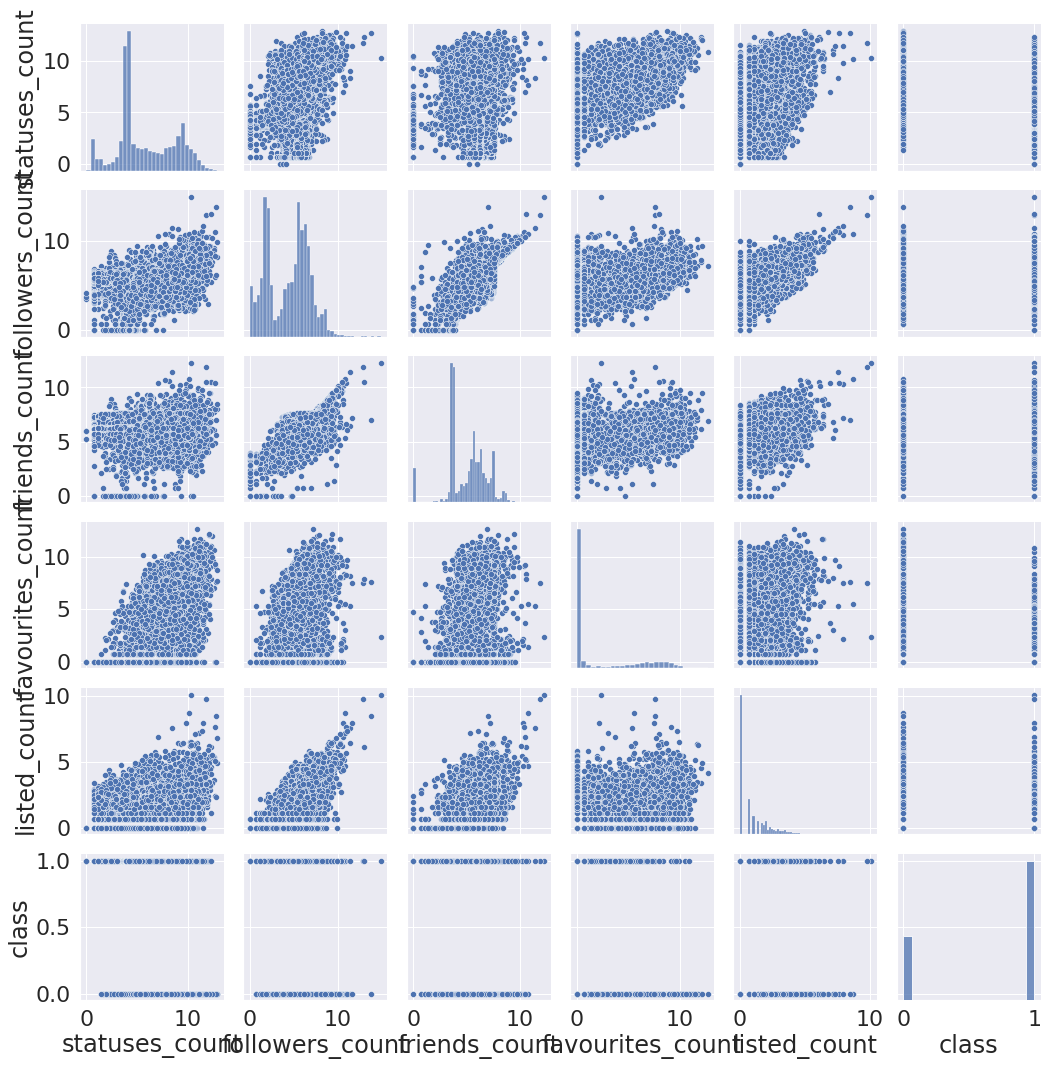

In [155]:

sns.pairplot(df_pairplot)

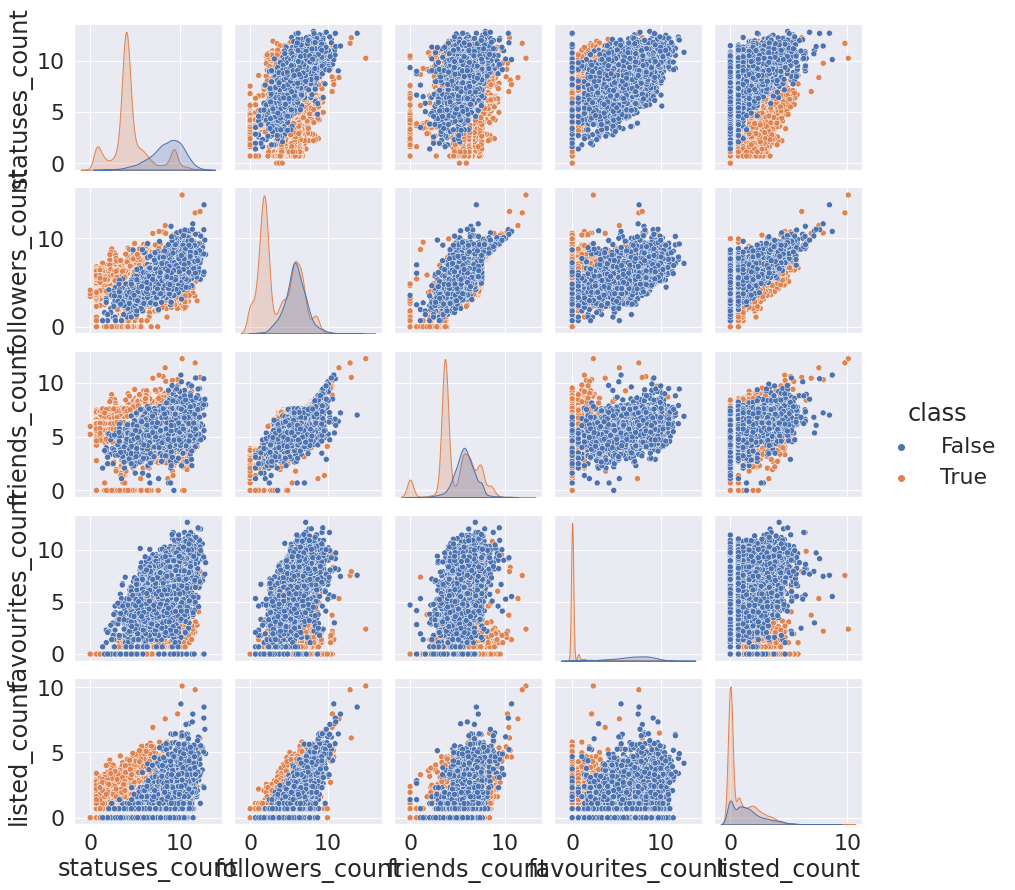

In [156]:
sns.pairplot(df_pairplot, hue = 'class')

Text(0.5, 0, 'Z Label')

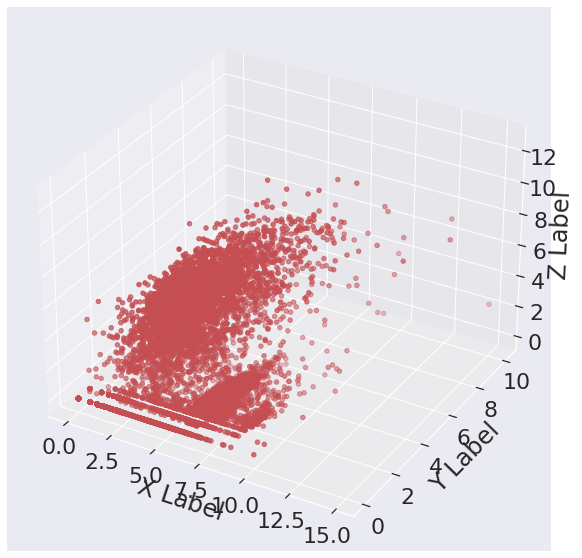

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log(df['followers_count']+1), np.log(df['listed_count']+1), np.log(df['favourites_count']+1), c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [159]:
fig = px.scatter_3d(df, x=np.log(df['statuses_count']+1), y=np.log(df['followers_count']+1), z=np.log(df['listed_count']+1),color=df['class'],labels= True)
fig.show()


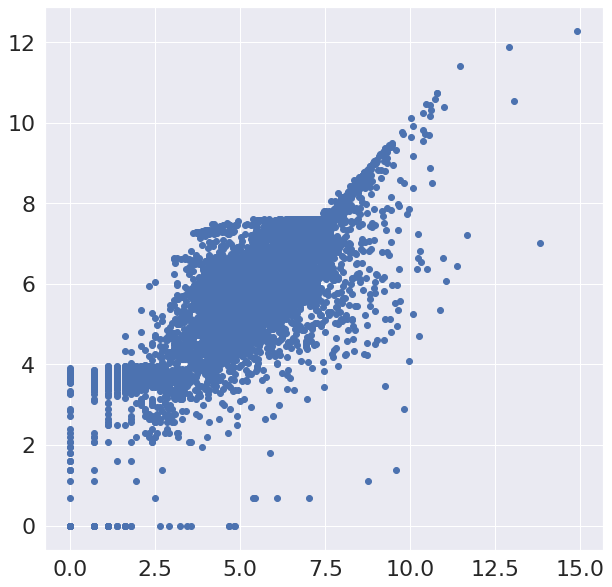

In [160]:

plt.scatter(np.log(df['followers_count']+1), np.log(df['friends_count']+1))

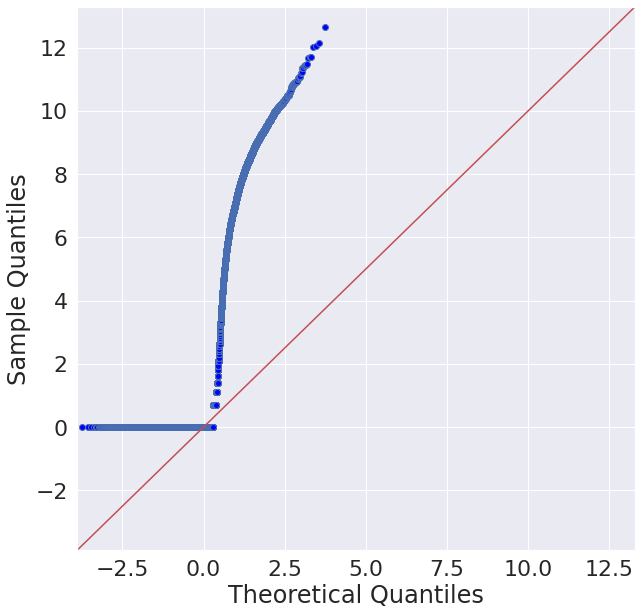

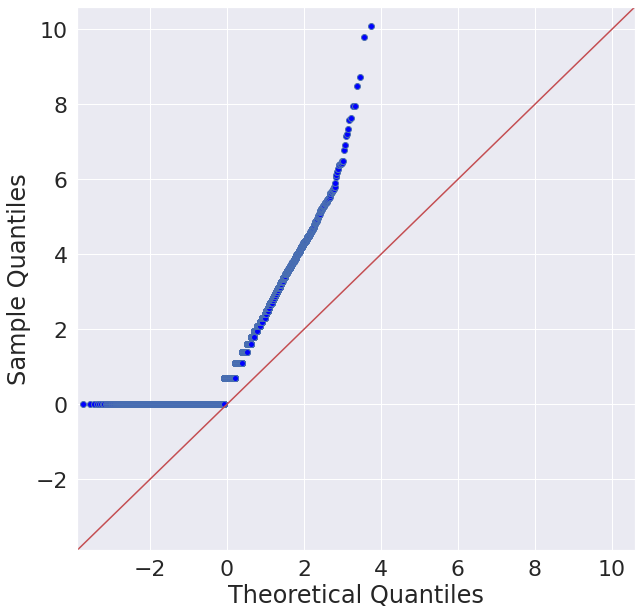

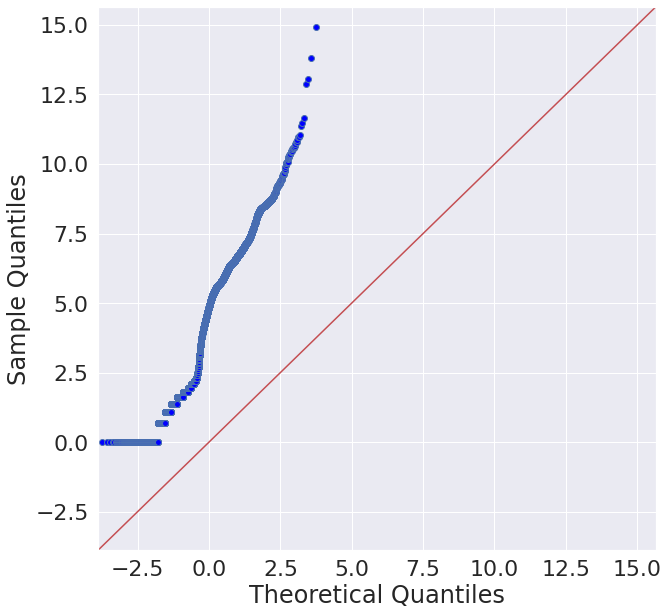

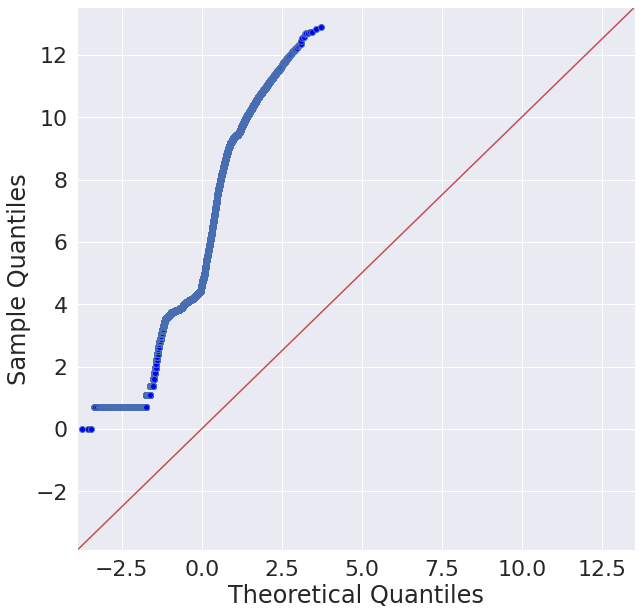

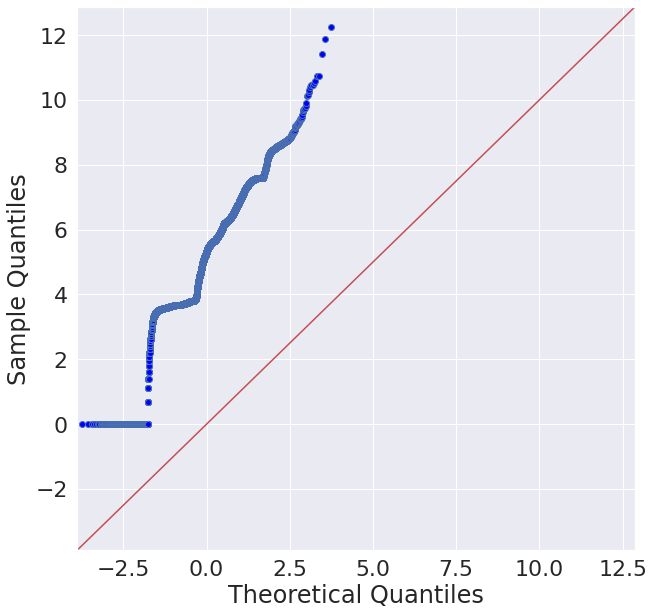

In [158]:
fig_5 = sm.qqplot(np.log(df['favourites_count']+1), line = '45')
fig_4 = sm.qqplot(np.log(df['listed_count']+1), line = '45')
fig_3 = sm.qqplot(np.log(df['followers_count']+1), line = '45')
fig_2 = sm.qqplot(np.log(df['statuses_count']+1), line = '45')
fig_1 = sm.qqplot(np.log(df['friends_count']+1), line = '45')
plt.show()

In [101]:

df['profile_background_tile'].value_counts()

1.0    5331
Name: profile_background_tile, dtype: int64

In [130]:
# converting certain categorical variables to boolean for analysis
df["default_profile"] = df["default_profile"].astype("bool")
df["default_profile_image"] = df["default_profile_image"].astype("bool")
df["protected"] = df["protected"].astype("bool")
df["verified"] = df["verified"].astype("bool")
df["geo_enabled"] = df["geo_enabled"].astype("bool")
df["profile_use_background_image"] = df["profile_use_background_image"].astype("bool")
df["profile_background_tile"] = df["profile_background_tile"].astype("bool")
df["class"] = df["class"].astype("bool")
df.dtypes

Unnamed: 0                              int64
id                                      int64
name                                   object
screen_name                            object
statuses_count                          int64
followers_count                         int64
friends_count                           int64
favourites_count                        int64
listed_count                            int64
url                                    object
lang                                   object
time_zone                              object
location                               object
default_profile                          bool
default_profile_image                    bool
geo_enabled                              bool
profile_image_url                      object
profile_banner_url                     object
profile_use_background_image             bool
profile_background_image_url_https     object
profile_text_color                     object
profile_image_url_https           

In [37]:
#creating a dataframe to work with categorical variables of dataframe df
df_profile = pd.DataFrame()

#### Evaluating various columns to understand if there is any association of the data type in classification

In [101]:

df['profile_background_tile'].value_counts()

1.0    5331
Name: profile_background_tile, dtype: int64

In [40]:
df['profile_text_color'].describe()

count      10017
unique       406
top       333333
freq        6992
Name: profile_text_color, dtype: object

In [21]:
df['profile_text_color'].value_counts()

333333    6992
0         1013
000000     517
666666     302
3D1957     215
          ... 
2F0EEB       1
736C6C       1
12151F       1
2A52D3       1
D1B17E       1
Name: profile_text_color, Length: 406, dtype: int64

In [37]:
df.loc[df['profile_text_color'] == '333333', 'text_color'] = "C_333333"
df.loc[df['profile_text_color'] == '000000', 'text_color'] = "C_000000"
df.loc[df['profile_text_color'] == '666666', 'text_color'] = "C_666666"
df.loc[(df['profile_text_color'] != '333333')&(df['profile_text_color'] != '000000')&(df['profile_text_color'] != '666666'), 'text_color'] = "c_unknown"

In [38]:
df['text_color'].value_counts()

C_333333     6992
c_unknown    3206
C_000000      517
C_666666      302
Name: text_color, dtype: int64

In [43]:
df['profile_banner_url'].describe()

count                                                  4819
unique                                                 4819
top       https://pbs.twimg.com/profile_banners/14037950...
freq                                                      1
Name: profile_banner_url, dtype: object

In [60]:
df.loc[pd.isnull(df['profile_banner_url']), 'banner_url'] = 'banner_absent'
df.loc[pd.isnull(df['profile_banner_url']) == False, 'banner_url'] = 'banner_present'

In [58]:
(pd.isnull(df['profile_banner_url'])).value_counts()

True     6198
False    4819
Name: profile_banner_url, dtype: int64

In [59]:
pd.isnull(df['profile_banner_url']).value_counts()

SyntaxError: invalid syntax (<ipython-input-59-8f365b15baaa>, line 1)

In [61]:
df['banner_url'].value_counts()

banner_absent     6198
banner_present    4819
Name: banner_url, dtype: int64

In [72]:
df['class'].value_counts()

1    7543
0    3474
Name: class, dtype: int64

<AxesSubplot:xlabel='text_color', ylabel='count'>

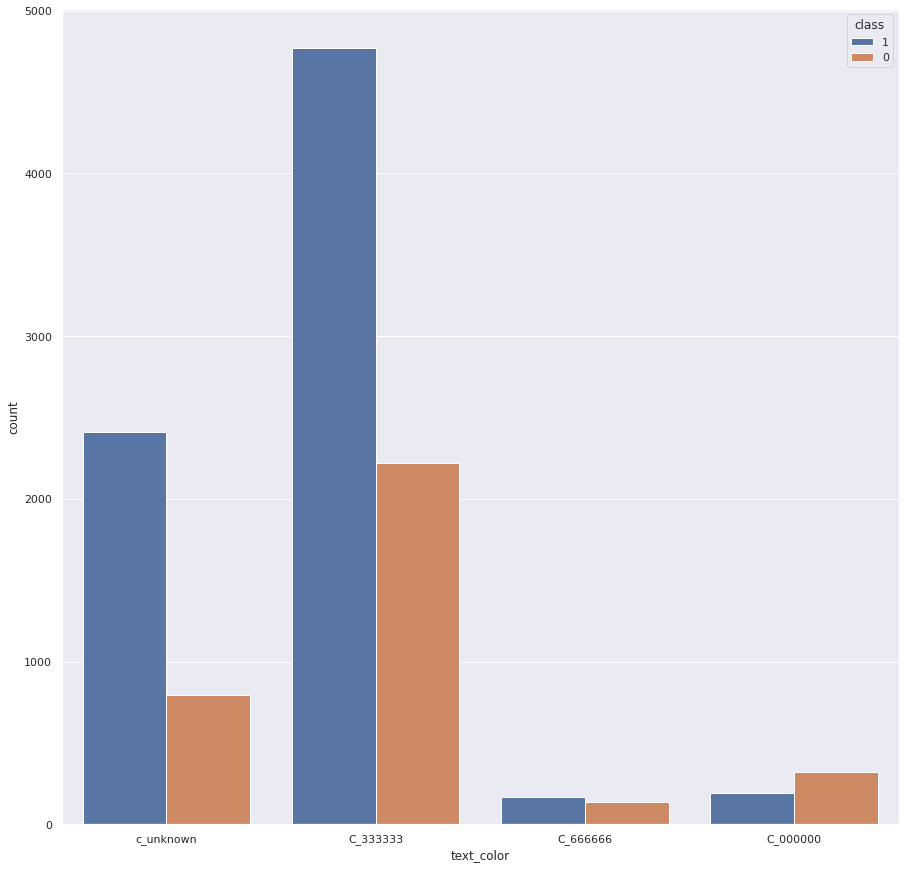

In [74]:
sns.countplot(x = 'text_color', hue = 'class', data = df)

In [81]:
df_test1  = df.groupby(by = 'class').count()
df_test1.head()

name  screen_name  statuses_count  followers_count  friends_count  \
class                                                                      
0      3473         3474            3474             3474           3474   
1      7543         7543            7543             7543           7543   

       favourites_count  listed_count   url  lang  time_zone  ...  \
class                                                         ...   
0                  3474          3474  1266  3474       2475  ...   
1                  7543          7543  2242  6543       2540  ...   

       profile_link_color  protected  verified  following  created_at  \
class                                                                   
0                    3474         78        11          0        3474   
1                    6543          0         0          0        7543   

       timestamp  Category  text_Color  text_color  banner_url  
class                                                           
0           3474      3474        2679        3474        3474  
1           7543      7543        5132        7543        7543  

[2 rows x 34 columns]

In [89]:
df_test1 = df_test1.drop(columns = ['name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count'], axis =1)

In [90]:
df_test1 = df_test1.drop(columns = ['listed_count', 'lang', 'profile_image_url', 'profile_link_color', 'created_at'])

In [91]:
df_test1.head()

url  time_zone  default_profile  default_profile_image  geo_enabled  \
class                                                                         
0      1266       2475             1032                     13         2155   
1      2242       2540              445                     59         1139   

       profile_banner_url  profile_use_background_image  \
class                                                     
0                    3165                          3084   
1                    1654                          6419   

       profile_background_image_url_https  profile_text_color  \
class                                                           
0                                    3474                3474   
1                                    6543                6543   

       profile_image_url_https  ...  profile_background_image_url  \
class                           ...                                 
0                         3474  ...                          3474   
1                         6543  ...                          7543   

       profile_background_color  protected  verified  following  timestamp  \
class                                                                        
0                          3474         78        11          0       3474   
1                          6543          0         0          0       7543   

       Category  text_Color  text_color  banner_url  
class                                                
0          3474        2679        3474        3474  
1          7543        5132        7543        7543  

[2 rows x 23 columns]

<AxesSubplot:xlabel='banner_url', ylabel='count'>

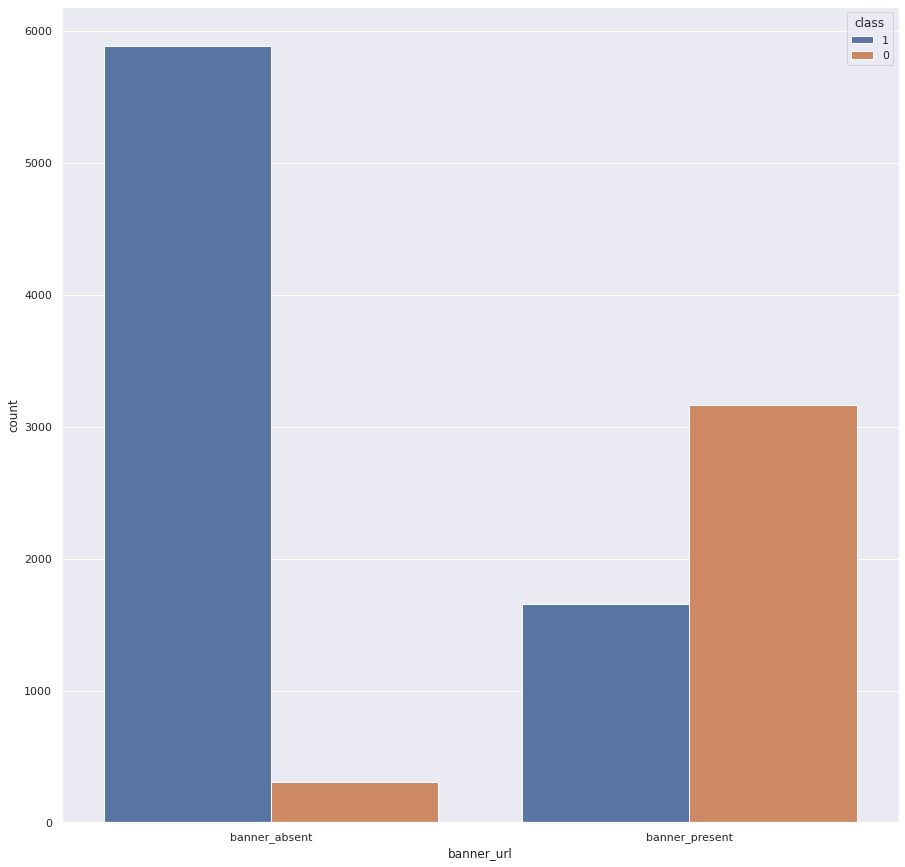

In [73]:
sns.countplot(x = 'banner_url', hue = 'class', data = df)

In [11]:
sns.set(rc = {'figure.figsize':(15, 15)} )

<AxesSubplot:xlabel='profile_text_color', ylabel='count'>

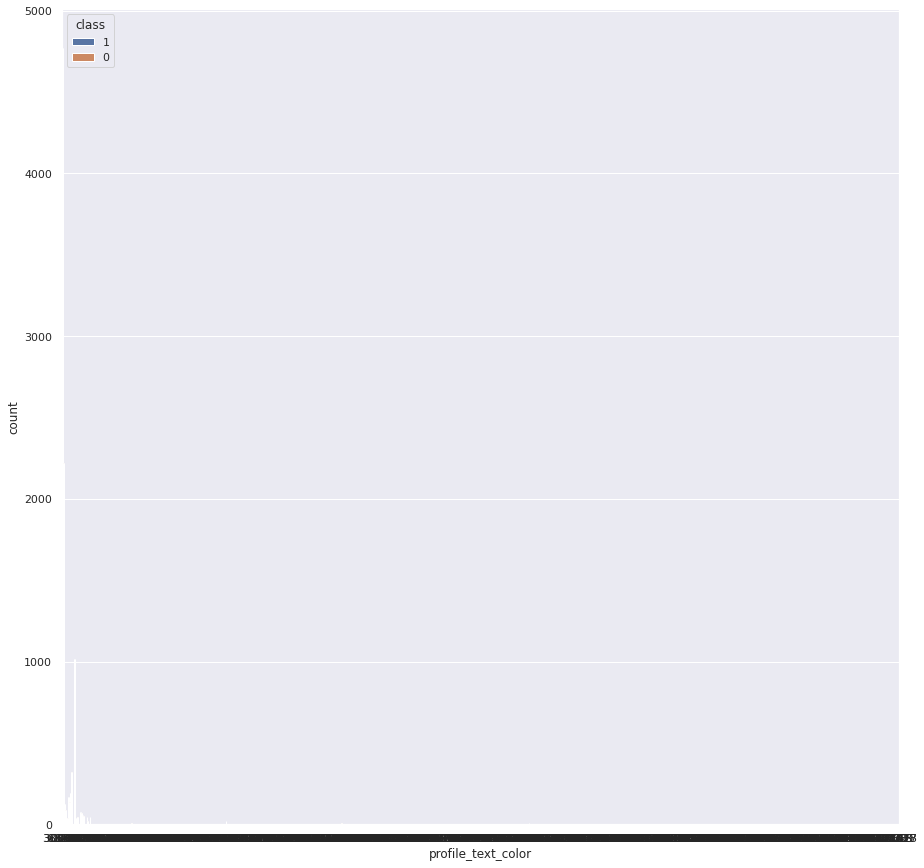

In [15]:
#figuring a way to plot if profile text color is related to class in some manner
#sns.countplot(hue = 'class', data = df, x = 'profile_text_color')

<AxesSubplot:ylabel='profile_text_color'>

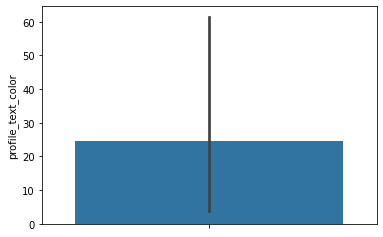

In [73]:
sns.barplot(y = df['profile_text_color'].value_counts(), data = df)

In [46]:
df_copy = df

In [54]:
df['verified'] = df['verified'].astype('category')
df['class'] = df['class'].astype('category')
df['profile_text_color'] = df['profile_text_color'].astype('category')

In [64]:
df.loc[df['profile_text_color'] == '333333'].count()

name                                  6991
screen_name                           6992
statuses_count                        6992
followers_count                       6992
friends_count                         6992
favourites_count                      6992
listed_count                          6992
url                                   1365
lang                                  6992
time_zone                             2363
default_profile                       1477
default_profile_image                   69
geo_enabled                           1467
profile_image_url                     6992
profile_banner_url                    2481
profile_use_background_image          6848
profile_background_image_url_https    6992
profile_text_color                    6992
profile_image_url_https               6992
profile_sidebar_border_color          6992
profile_background_tile               4460
profile_sidebar_fill_color            6992
profile_background_image_url          6992
profile_bac

In [50]:
table = pd.pivot_table(df, values = 'profile_text_color', index = ['verified'], columns = ['class'], aggfunc= np.count_nonzero, dropna= False)
table

class        0   1
verified          
1.0       11.0 NaN

In [ ]:
# putting missing values as 0 in default_profile, protected, default_profile_image and verified columns
df_profile[]
df_profile["default_profile"] = df["default_profile"] #10
df_profile["default_profile_image"] = df["default_profile_image"] #11
df_profile["geo_enabled"] = df["geo_enabled"] #12
df_profile["profile_use_background_image"] = df["profile_use_background_image"] #15
df_profile["profile_image_url"] = df["geo_enabled"] #13
df_profile["profile_background_tile"] = df["profile_background_tile"] #20
df_profile["profile_use_background_image"] = df["profile_use_background_image"]


In [102]:
from datetime import date
df["age"]=date.today().year - pd.DatetimeIndex(df["timestamp"]).year


In [109]:
?DataFrame.loc[]

Object `DataFrame.loc[]` not found.


In [115]:
df1=df[["id","url","time_zone","location","geo_enabled","description","class"]]
df2=df1.groupby("class").count()
df2

id   url  time_zone  location  geo_enabled  description
class                                                           
0      3474  1266       2475      2365         2155         3095
1      7543  2242       2540      2543         1139         3251

<AxesSubplot:xlabel='class'>

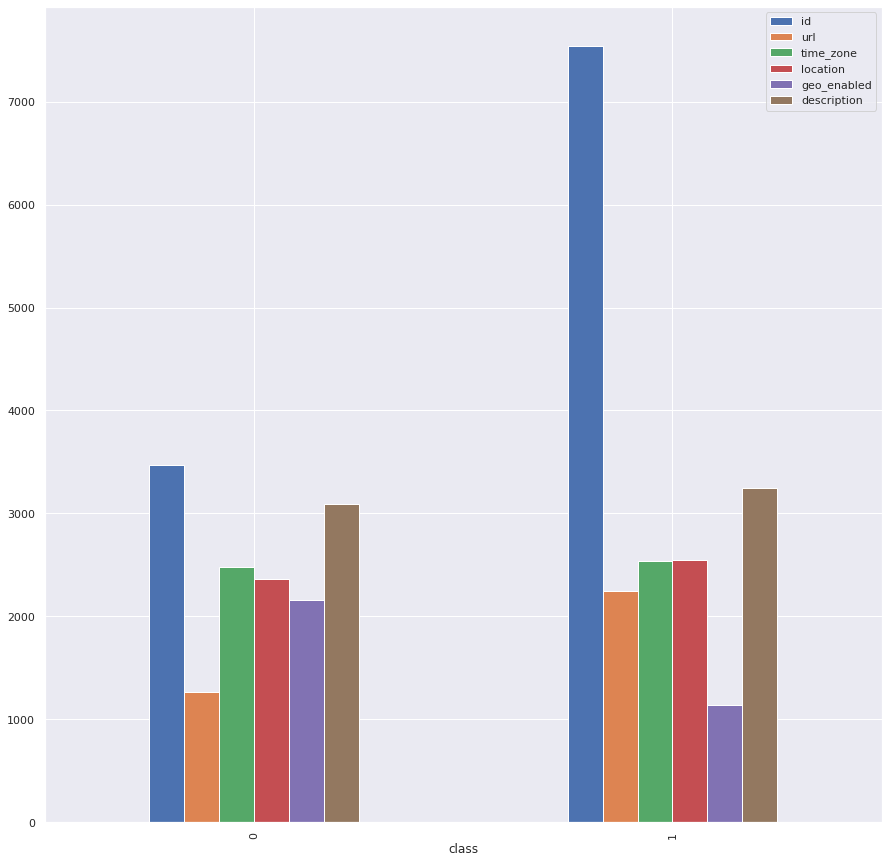

In [116]:
df2.plot(kind='bar')

In [117]:
df3=df.loc[:,["id","url","time_zone","location","geo_enabled","description","Category"]]
df4=df3.groupby("Category").count()
df4

id   url  time_zone  location  geo_enabled  description
Category                                                               
genuine       3474  1266       2475      2365         2155         3095
social1        991    22        903       745           18          943
social2       3457    10         14        13            5           14
social3        464   253        303        54           10          460
traditional1  1000   396          0       243           19          221
traditional2   100    97        100         1            0           97
traditional3   403   336        100       359            4          388
traditional4  1128  1128       1120      1128         1083         1128

<AxesSubplot:xlabel='Category'>

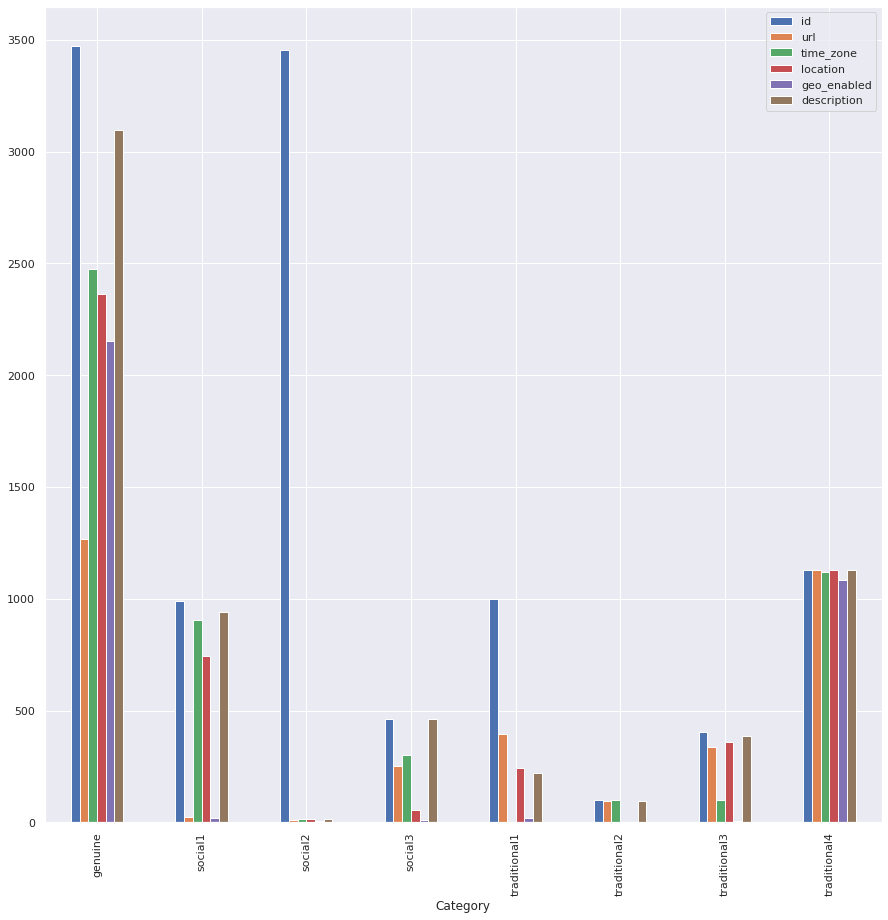

In [118]:

df4.plot(kind='bar')